In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# Load the data
data = pd.read_csv('../data/raw/historical_data.csv')
data

,type,suburb,Count,Date,Median
0,1 bedroom flat,Albert Park-Middle Park-West St Kilda,352.0,Mar 2000,165.0
1,1 bedroom flat,Armadale,210.0,Mar 2000,150.0
2,1 bedroom flat,Carlton North,87.0,Mar 2000,150.0
3,1 bedroom flat,Carlton-Parkville,303.0,Mar 2000,165.0
4,1 bedroom flat,CBD-St Kilda Rd,755.0,Mar 2000,250.0
...,...,...,...,...,...
202855,All properties,Group Total,11944.0,Mar 2023,485.0
202856,All properties,Group Total,11944.0,Mar 2023,425.0
202857,All properties,Group Total,11944.0,Mar 2023,380.0
202858,All properties,Group Total,11944.0,Mar 2023,400.0


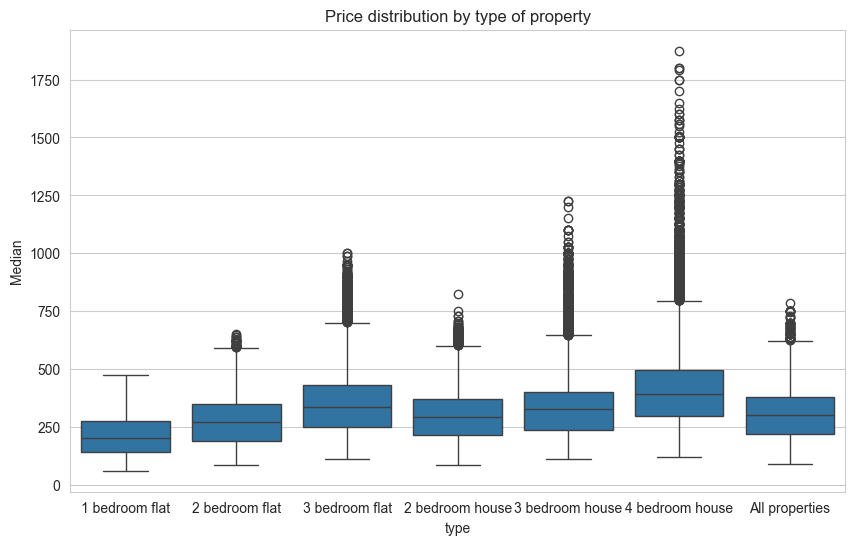

In [26]:
# Plot the price for each type of property
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='Median', data=data)
plt.title('Price distribution by type of property')
plt.show()

In [27]:
# Convert the Date column to datetime
# data['Date'] = pd.to_datetime(data['Date'])

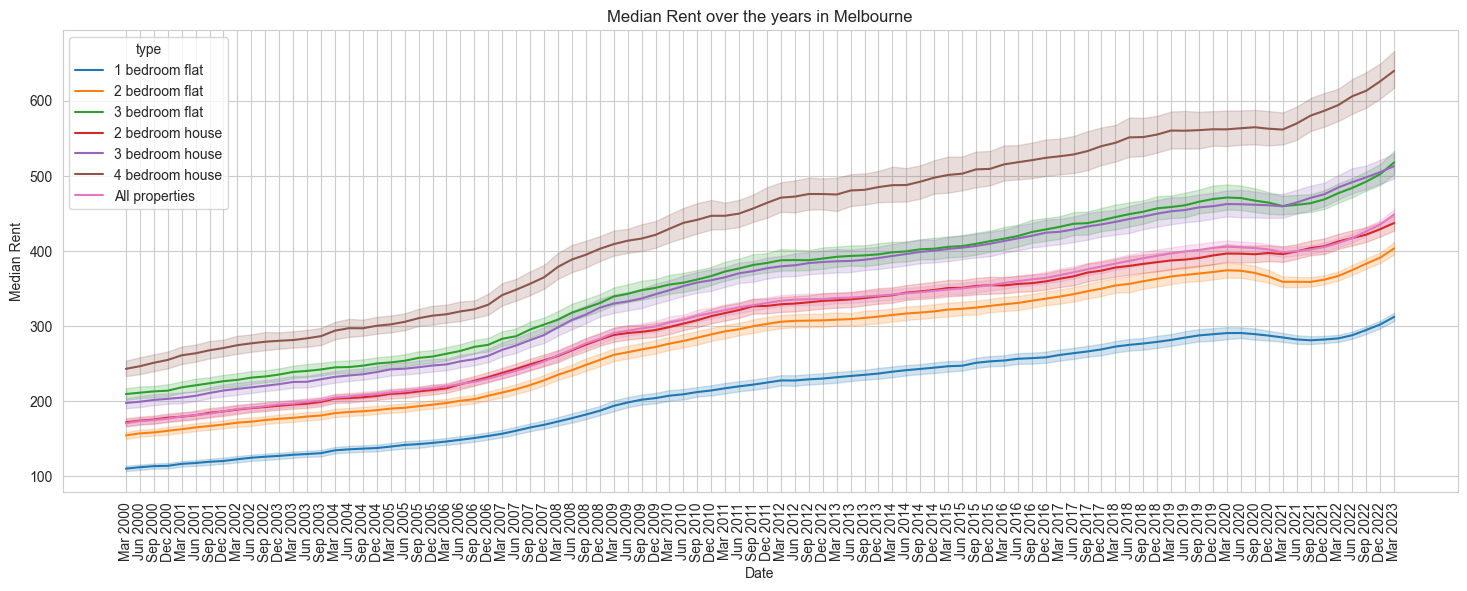

In [28]:
# Plot the price by Date
plt.figure(figsize=(18, 6))
sns.lineplot(x='Date', y='Median', data=data, hue='type')
plt.title('Median Rent over the years in Melbourne')
plt.xlabel('Date')
plt.ylabel('Median Rent')
plt.xticks(rotation=90)
plt.show()